# Autoencoders and Transfer Learning

This explores the application of Autoencoder in machine learning and it's role in enhancing the performance of convolutional neural networks(CNN) via transfer learning.

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras import datasets, models, layers
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix

# Get the Data

In [2]:
# load fashion_mnist dataset from tensorflow into a train and test dictionaries
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [3]:
# Store first 60,000 to unsupervised dataset with one key 'images', the next 10,000 to supervised with 'images' and 'labels'
unsupervised_emander = {'images': x_train}
supervised_emander = {'images': x_test, 'labels': y_test}

print(f"Training unsupervised_emander: {len(unsupervised_emander['images'])}")
print(f"supervised_emander Size: {len(supervised_emander['images'])}")
print(f"Image Resolution: {unsupervised_emander['images'][0].shape}")

Training unsupervised_emander: 60000
supervised_emander Size: 10000
Image Resolution: (28, 28)


# Data Preprocessing

In [4]:
# Take the largest pixel value for normalization
combined_images = np.concatenate((unsupervised_emander['images'], supervised_emander['images']), axis=0) 
largest_px_value = np.amax(combined_images)
print(f"Largest Pixel Value: {largest_px_value}")

Largest Pixel Value: 255


In [5]:
# Normalize the pixel values to range of 0-1
unsupervised_emander['images'] = unsupervised_emander['images'] / largest_px_value
supervised_emander['images'] = supervised_emander['images'] / largest_px_value

In [6]:
# One-hot encode the labels
supervised_emander['labels'] = tf.keras.utils.to_categorical(supervised_emander['labels'], num_classes=10)

In [7]:
# Print the shapes of my datasets
print(f"unsupervised_emander Data: {unsupervised_emander['images'].shape}")
print(f"supervised_emander images Data: {supervised_emander['images'].shape}")
print(f"supervised_emander labels Data: {supervised_emander['labels'].shape}")

unsupervised_emander Data: (60000, 28, 28)
supervised_emander images Data: (10000, 28, 28)
supervised_emander labels Data: (10000, 10)


# Data Preparation (Training, Validation, Testing)

In [8]:
# Split unsupervised_emander to 57000:3000
unsupervised_train_emander, unsupervised_val_emander = train_test_split(unsupervised_emander['images'], test_size=0.05, random_state=13)

In [9]:
# Discard 7000 data from supervised_emander
supervised_emander['images'], _, supervised_emander['labels'], _ = train_test_split(supervised_emander['images'], supervised_emander['labels'], test_size=0.7, shuffle=True, random_state=13)

In [10]:
# Split supervised_emander to 1800:600:600 train:test:val respectively
x_train_emander, x_test_emander, y_train_emander, y_test_emander = train_test_split(supervised_emander['images'], supervised_emander['labels'], test_size=0.2, shuffle=True, random_state=13)
x_train_emander, x_val_emander, y_train_emander, y_val_emander = train_test_split(x_train_emander, y_train_emander, test_size=600, shuffle=True, random_state=13)

print(f'unsupervised_train_emander shape: {unsupervised_train_emander.shape}')
print(f'unsupervised_val_emander shape: {unsupervised_val_emander.shape}')
print(f'x_train_emander shape: {x_train_emander.shape}')
print(f'x_val_emander shape: {x_val_emander.shape}')
print(f'x_test_emander shape: {x_test_emander.shape}')
print(f'y_train_emander shape: {y_train_emander.shape}')
print(f'y_val_emander shape: {y_val_emander.shape}')
print(f'y_test_emander shape: {y_test_emander.shape}')

unsupervised_train_emander shape: (57000, 28, 28)
unsupervised_val_emander shape: (3000, 28, 28)
x_train_emander shape: (1800, 28, 28)
x_val_emander shape: (600, 28, 28)
x_test_emander shape: (600, 28, 28)
y_train_emander shape: (1800, 10)
y_val_emander shape: (600, 10)
y_test_emander shape: (600, 10)


# Build, Train, and Validate a baseline CNN Model

In [11]:
# Build CNN model
cnn_v1_model_emander = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', strides=2),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', strides=2),
    layers.Flatten(),
    layers.Dense(100),
    layers.Dense(10, activation='softmax')
    ])

In [13]:
# Compile the CNN model
cnn_v1_model_emander.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Summary of the model
cnn_v1_model_emander.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 16)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

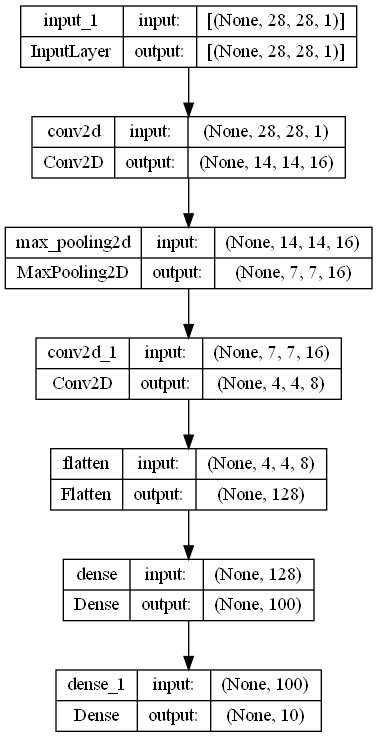

In [15]:
# Draw the diagram for the summary
plot_model(cnn_v1_model_emander, show_shapes=True, show_layer_names=True)

In [16]:
# Fit the model to our train and val dataset
cnn_v1_history_emander = cnn_v1_model_emander.fit(x_train_emander,
                                                  y_train_emander,
                                                  epochs=10,
                                                  batch_size=256,
                                                  validation_data=(x_val_emander, y_val_emander))

Epoch 1/10


8/8 [==============================] - 1s 35ms/step - loss: 2.2550 - accuracy: 0.2656 - val_loss: 2.1816 - val_accuracy: 0.3733
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 2.1332 - accuracy: 0.3739 - val_loss: 2.0202 - val_accuracy: 0.4250
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 1.9417 - accuracy: 0.4394 - val_loss: 1.7772 - val_accuracy: 0.5167
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 1.6799 - accuracy: 0.5372 - val_loss: 1.4908 - val_accuracy: 0.5600
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 1.4016 - accuracy: 0.5589 - val_loss: 1.2110 - val_accuracy: 0.6050
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 1.1616 - accuracy: 0.5972 - val_loss: 1.0312 - val_accuracy: 0.6267
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 1.0238 - accuracy: 0.6117 - val_loss: 0.9351 - val_accuracy: 0.6067
Epoch 8/10
8/8 [===============

# Test and analyze the baseline CNN model

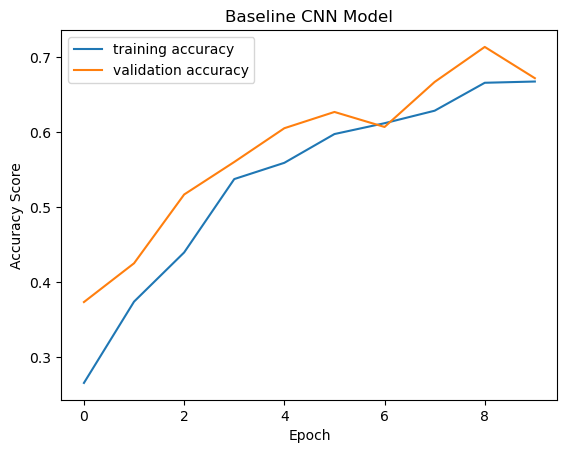

In [51]:
# Plot the training and validation accuracy
plt.plot(cnn_v1_history_emander.history['accuracy'], label='training accuracy')
plt.plot(cnn_v1_history_emander.history['val_accuracy'], label='validation accuracy')
plt.title('Baseline CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

**Compare and analyze the training and validation accuracy in your report.**

The training and validation accuracies shown improvement over the epochs which means that the model is learning and converging. There is a noticeable gap between the validation and training accuracy in the earlier epochs. However, this narrows as the training progresses which means that the model starts to generalize better over time.

In [61]:
# Evaluate the cnn model with the test dataset
cnn_v1_test_loss, cnn_v1_test_accuracy = cnn_v1_model_emander.evaluate(x_test_emander, y_test_emander)

print(f'Baseline CNN test accuracy: {cnn_v1_test_accuracy}')
print(f'Baseline CNN test loss: {cnn_v1_test_loss}')
print(f"Baseline CNN val accuracy: {cnn_v1_history_emander.history['val_accuracy'][-1]}")

19/19 [==============================] - 0s 1ms/step - loss: 0.8610 - accuracy: 0.6600
Baseline CNN test accuracy: 0.6600000262260437
Baseline CNN test loss: 0.8610344529151917
Baseline CNN val accuracy: 0.67166668176651


**Compare and discuss the test accuracy to the validation accuracy in your report**

The test and validation accuracies are pretty close to each other. Given that they are close to each other, it suggests that the model has a good generalization capabilities.

In [19]:
# Create predications on the test dataset
cnn_predictions_emander = cnn_v1_model_emander.predict(x_test_emander)

19/19 [==============================] - 0s 1ms/step


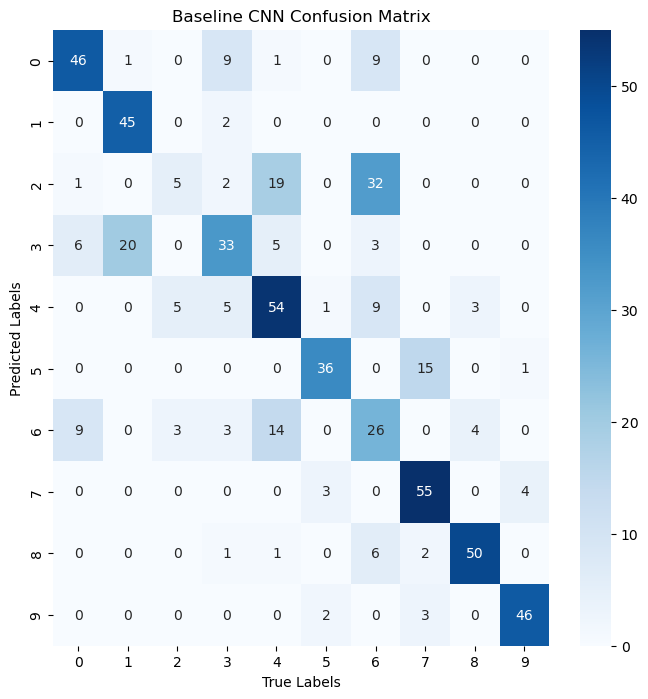

In [20]:
# Display confusion matrix of the test prediction
cm_v1 = confusion_matrix(np.argmax(y_test_emander, axis=1), np.argmax(cnn_predictions_emander, axis=1))

plt.figure(figsize=(8,8))
sns.heatmap(cm_v1, annot=True, cmap='Blues')
plt.title('Baseline CNN Confusion Matrix')
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.show()

**Analyze and discuss the confusion matrix in your report**

Given our accuracies, the model has a variety of prediction across different classes. While the model performs well for most classes, there is a notable confusion between others. Confusion between 2 and 6 or 1 and 3 could indicate a visual similarity in the fashion MNIST.

# Add random noise to train and val unsupervised dataset using tf.random.normal

In [21]:
# Setup noise factor and seed variables
noise_factor = 0.2
tf.random.set_seed(13)

In [22]:
# Add random noise to train and val using tf.random.normal
x_train_noisy_emander = unsupervised_train_emander + noise_factor * tf.random.normal(unsupervised_train_emander.shape)
x_val_noisy_emander = unsupervised_val_emander + noise_factor * tf.random.normal(unsupervised_val_emander.shape)

In [23]:
# Clip the noisy dataset values to range it between 0 and 1
x_train_noisy_emander = tf.clip_by_value(x_train_noisy_emander, 0, 1)
x_val_noisy_emander = tf.clip_by_value(x_val_noisy_emander, 0, 1)

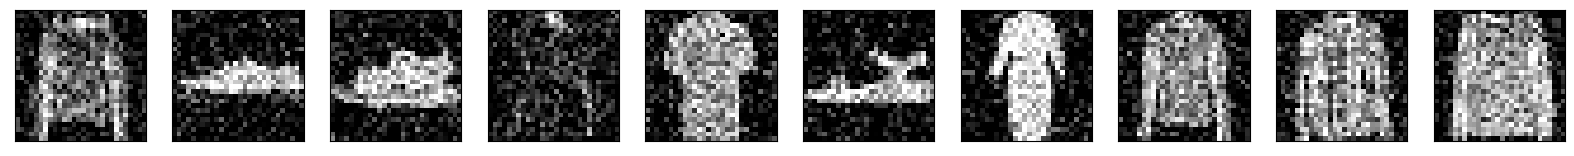

In [24]:
# Display first 10 images of train noisy dataset
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_val_noisy_emander[i])
    plt.gray()
    plt.xticks([])
    plt.yticks([])
plt.show()

# Build and pretain Autoencoder

In [25]:
# Input layer
inputs_emander = layers.Input(shape=(28, 28, 1), name='inputs_emander')

In [26]:
# Encoder Section
e_emander1 = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', strides=2, name='e_emander1')(inputs_emander)
e_emander2 = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', strides=2, name='e_emander2')(e_emander1)

In [27]:
# Decoder Section
d_emander1 = layers.Conv2DTranspose(filters=8, kernel_size=(3,3), activation='relu', padding='same', strides=2, name='d_emander1')(e_emander2)
d_emander2 = layers.Conv2DTranspose(filters=16, kernel_size=(3,3), activation='relu', padding='same', strides=2, name='d_emander2')(d_emander1)
d_emander3 = layers.Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same', name='d_emander3')(d_emander2)

In [28]:
# Autoencoder Model
autoencoder_emander = models.Model(inputs=inputs_emander, outputs=d_emander3)

In [29]:
# Compile the CNN model
autoencoder_emander.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Summary of the model
autoencoder_emander.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_emander (InputLayer  [(None, 28, 28, 1)]       0         
 )                                                               
                                                                 
 e_emander1 (Conv2D)         (None, 14, 14, 16)        160       
                                                                 
 e_emander2 (Conv2D)         (None, 7, 7, 8)           1160      
                                                                 
 d_emander1 (Conv2DTranspos  (None, 14, 14, 8)         584       
 e)                                                              
                                                                 
 d_emander2 (Conv2DTranspos  (None, 28, 28, 16)        1168      
 e)                                                              
                                                             

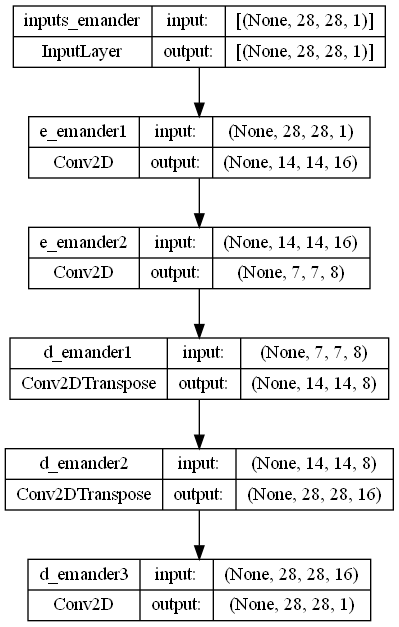

In [31]:
# Draw the diagram for the summary
plot_model(autoencoder_emander, show_shapes=True, show_layer_names=True)

In [32]:
# fit the model to our train and val dataset
autoencoder_history_emander = autoencoder_emander.fit(x_train_noisy_emander,
                                                      unsupervised_train_emander,
                                                      epochs=10,
                                                      batch_size=256,
                                                      shuffle=True,
                                                      validation_data=(x_val_noisy_emander, unsupervised_val_emander))

Epoch 1/10
223/223 [==============================] - 4s 14ms/step - loss: 0.0599 - val_loss: 0.0164
Epoch 2/10
223/223 [==============================] - 3s 14ms/step - loss: 0.0139 - val_loss: 0.0125
Epoch 3/10
223/223 [==============================] - 3s 13ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 4/10
223/223 [==============================] - 3s 15ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 5/10
223/223 [==============================] - 3s 14ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 6/10
223/223 [==============================] - 3s 13ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 7/10
223/223 [==============================] - 3s 13ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 8/10
223/223 [==============================] - 3s 12ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 9/10
223/223 [==============================] - 3s 12ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 10/10
223/223 [==============================] - 3s 13ms/step - loss: 0.0089 - val_lo

In [33]:
# Create predications on the test dataset
autoencoder_predictions_emander = autoencoder_emander.predict(unsupervised_val_emander)

94/94 [==============================] - 0s 2ms/step


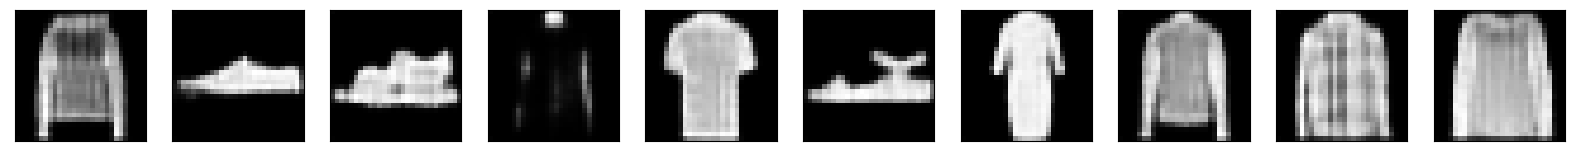

In [34]:
# Display first 10 images of train noisy dataset
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(autoencoder_predictions_emander[i])
    plt.gray()
    plt.xticks([])
    plt.yticks([])
plt.show()

# Build and perform transfer learning on a CNN with the Autoencoder

In [35]:
# Setup the pretrained model from the autoencoder model
encoder_layer_1 = autoencoder_emander.get_layer('e_emander2').output

autoencoder_base_model = models.Model(inputs=autoencoder_emander.input, outputs=encoder_layer_1)

In [36]:
# Freeze the base model
autoencoder_base_model.trainable = False

In [37]:
# Build the CNN model with transfer learning from autoencoder
cnn_v2_emander = models.Sequential([
    autoencoder_base_model,
    layers.Flatten(),
    layers.Dense(100),
    layers.Dense(10, activation='softmax')
    ])

In [38]:
autoencoder_base_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_emander (InputLayer  [(None, 28, 28, 1)]       0         
 )                                                               
                                                                 
 e_emander1 (Conv2D)         (None, 14, 14, 16)        160       
                                                                 
 e_emander2 (Conv2D)         (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1320 (5.16 KB)
_________________________________________________________________


In [39]:
# Compile the pretrained CNN model
cnn_v2_emander.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
cnn_v2_emander.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 7, 7, 8)           1320      
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               39300     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 40310 (157.46 KB)
Non-trainable params: 1320 (5.16 KB)
_________________________________________________________________


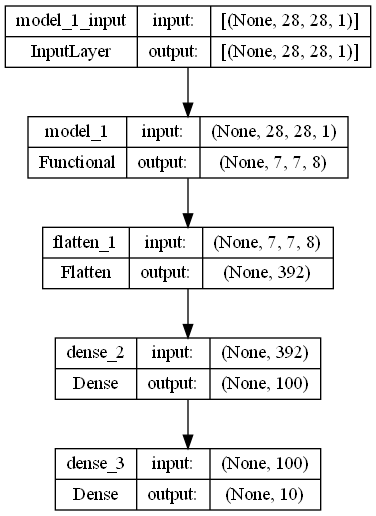

In [40]:
# Draw the diagram for the summary
plot_model(cnn_v2_emander, show_shapes=True, show_layer_names=True)

In [41]:
# fit the model to our train and val supervised dataset
cnn_v2_history_emander = cnn_v2_emander.fit(x_train_emander,
                                            y_train_emander,
                                            epochs=10,
                                            batch_size=256,
                                            validation_data=(x_val_emander, y_val_emander))

Epoch 1/10
8/8 [==============================] - 1s 29ms/step - loss: 2.3947 - accuracy: 0.2583 - val_loss: 1.5685 - val_accuracy: 0.4050
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 1.4135 - accuracy: 0.4778 - val_loss: 1.1688 - val_accuracy: 0.5567
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 1.1044 - accuracy: 0.5989 - val_loss: 0.9843 - val_accuracy: 0.6050
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 1.0051 - accuracy: 0.6178 - val_loss: 0.8856 - val_accuracy: 0.6617
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8825 - accuracy: 0.6689 - val_loss: 0.7784 - val_accuracy: 0.6967
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8843 - accuracy: 0.6722 - val_loss: 0.7528 - val_accuracy: 0.7067
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7944 - accuracy: 0.7144 - val_loss: 0.7374 - val_accuracy: 0.7133
Epoch 8/10
8/8 [=================

# Test and analyze the pretrained CNN model

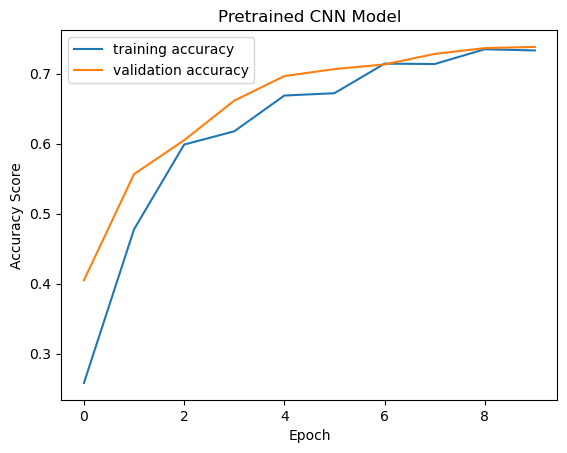

In [42]:
# Plot the training and validation accuracy
plt.plot(cnn_v2_history_emander.history['accuracy'], label='training accuracy')
plt.plot(cnn_v2_history_emander.history['val_accuracy'], label='validation accuracy')
plt.title('Pretrained CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

**Compare and analyze the training and validation accuracy in your report.**

The training and validation accuracies shown improvement over the epochs which means that the model is learning and converging. There is a noticeable gap between the validation and training accuracy in the earlier epochs. However, this narrows as the training progresses which means that the model starts to generalize better over time.

In [62]:
# Evaluate the cnn model with the test dataset
cnn_v2_test_loss, cnn_v2_test_accuracy = cnn_v2_emander.evaluate(x_test_emander, y_test_emander)

print(f'Pretrained CNN test accuracy: {cnn_v2_test_accuracy}')
print(f'Pretrained CNN test loss: {cnn_v2_test_loss}')
print(f"Pretrained CNN val accuracy: {cnn_v2_history_emander.history['val_accuracy'][-1]}")

19/19 [==============================] - 0s 2ms/step - loss: 0.7900 - accuracy: 0.6750
Pretrained CNN test accuracy: 0.675000011920929
Pretrained CNN test loss: 0.7899511456489563
Pretrained CNN val accuracy: 0.7383333444595337


**Compare and discuss the test accuracy to the validation accuracy in your report**

The model's performance on the unseen test set amounts to 67.5% which is not the best but as we train the model to higher epochs, we should see some improvements. The validation set accuracy is 73.83% which is used to tune the hyperparameters. All in all, the pretrained CNN model has a good performance on validation set, while its performance on the test set shows that there could be a room for improvement.

19/19 [==============================] - 0s 1ms/step


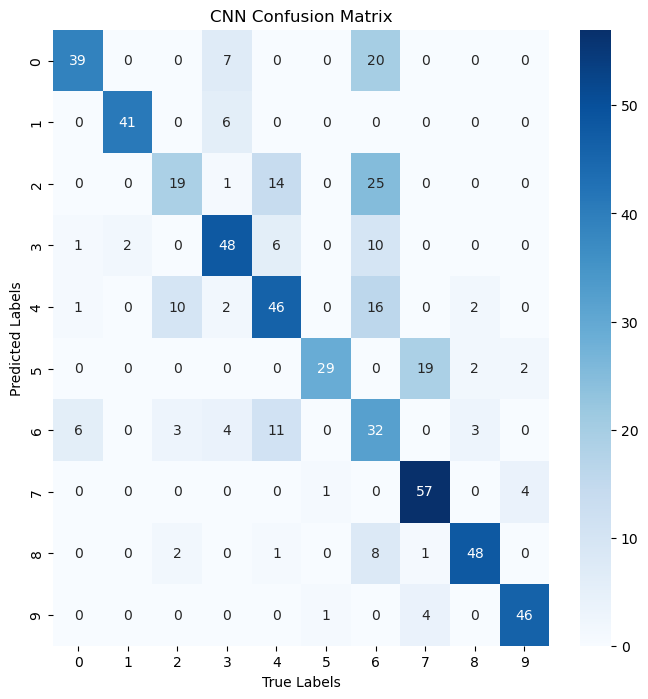

In [44]:
# Create predications on the test dataset
cnn_v2_predictions_emander = cnn_v2_emander.predict(x_test_emander)

# Display confusion matrix of the test prediction
cm_v2 = confusion_matrix(np.argmax(y_test_emander, axis=1), np.argmax(cnn_v2_predictions_emander, axis=1))

plt.figure(figsize=(8,8))
sns.heatmap(cm_v2, annot=True, cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.show()

**Analyze and discuss the confusion matrix in your report**

Given our accuracies, the model has a variety of prediction across different classes. Given our accuracies, the model has a variety of prediction across different classes. While the model performs well for most classes, there is a notable confusion between others. Confusion between 2 and 6 or 0 and 6 could indicate a visual similarity in the fashion MNIST. The pretrained model clearly shows a better confusion map compared to baseline CNN model.

# Compare the performance of the baseline CNN model to the trained pretrained model in your report

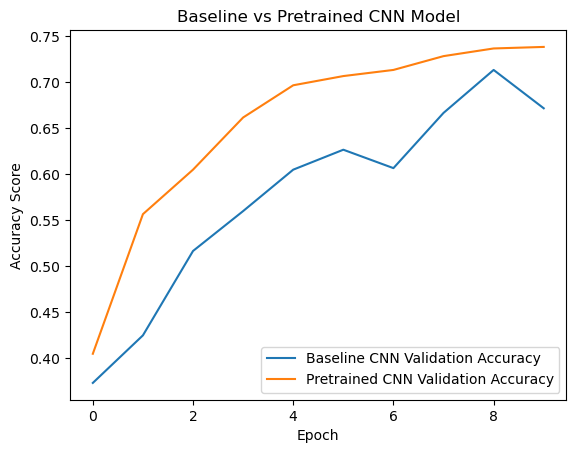

In [45]:
# Validation Accuracy of Basline vs Pretrained CNN Model
plt.plot(cnn_v1_history_emander.history['val_accuracy'], label='Baseline CNN Validation Accuracy')
plt.plot(cnn_v2_history_emander.history['val_accuracy'], label='Pretrained CNN Validation Accuracy')
plt.title('Baseline vs Pretrained CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

**Compare and analyze the validation accuracy**

The pretrained CNN shows a better performance against the validation data set compared to the baseline CNN model. This is due to the more advanced architectures with the pretrained transfer learning from autoencoder that helped improve performance.

In [46]:
# Test accuracy of baseline and pretrained CNN model
print(f'Baseline CNN test accuracy: {cnn_v1_test_accuracy}')
print(f'Pretrained CNN test accuracy: {cnn_v2_test_accuracy}')

Baseline CNN test accuracy: 0.6600000262260437
Pretrained CNN test accuracy: 0.675000011920929


**Compare and analyze the test accuracy**

Both models perform adequately good on the fashion MNIST dataset, with pretrained model slightly better than the baseline CNN in terms of testing on unseen data. While the transfer learning offers benefit, the approach in the baseline model remains effective for this type of classification type.